In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv("sales_predictions.csv")

In [3]:
df.head(10)

,Item_Identifier,weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet year.1
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.tail(10)

,Item_Identifier,weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet year.1
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.shape


(8523, 12)

In [6]:
df.describe()

,weight,Item_Visibility,Item_MRP,Outlet year,Outlet year.1
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   weight                7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet year           8523 non-null   int64  
 8   Outlet_Size           6113 non-null   object 
 9   Outlet_Location_Type  8523 non-null   object 
 10  Outlet_Type           8523 non-null   object 
 11  Outlet year.1         8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum()

Item_Identifier            0
weight                  1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet year                0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Outlet year.1              0
dtype: int64

In [9]:
df.weight.nunique(10)

415

In [10]:
df.weight.unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

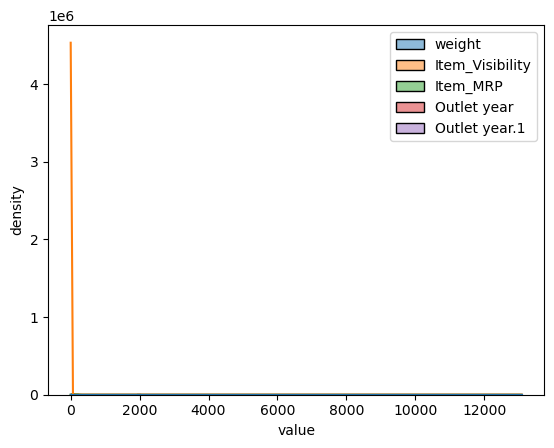

In [11]:
a = sns.histplot(df, kde = True, color = 'blue')
mp.xlabel('value')
mp.ylabel('density')
mp.show()

<Axes: xlabel='Outlet year', ylabel='Item_MRP'>

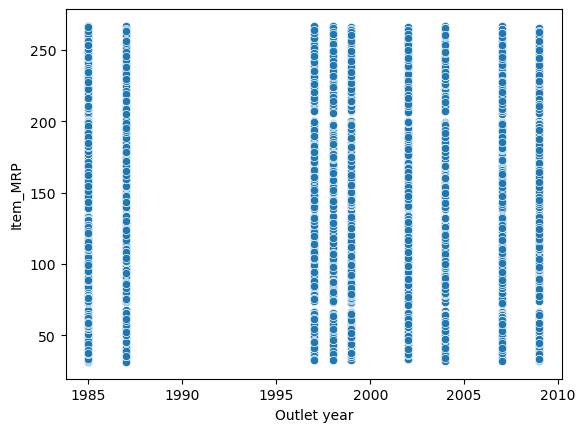

In [12]:
sns.scatterplot(x='Outlet year', y='Item_MRP', data=df)

<Axes: xlabel='Item_MRP', ylabel='Item_Type'>

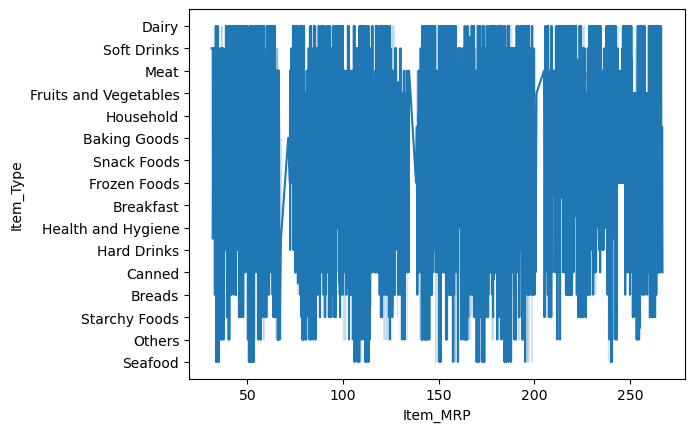

In [13]:
sns.lineplot(x=df.Item_MRP,y=df.Item_Type)

<Axes: xlabel='Item_MRP', ylabel='Item_Visibility'>

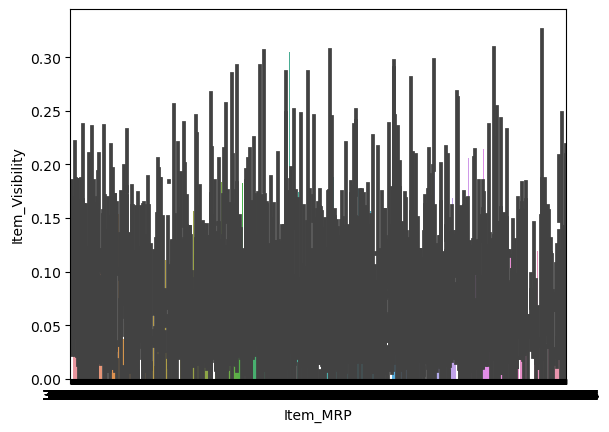

In [14]:
sns.barplot(x=df.Item_MRP,y=df.Item_Visibility )

<Axes: xlabel='Item_MRP', ylabel='Item_Visibility'>

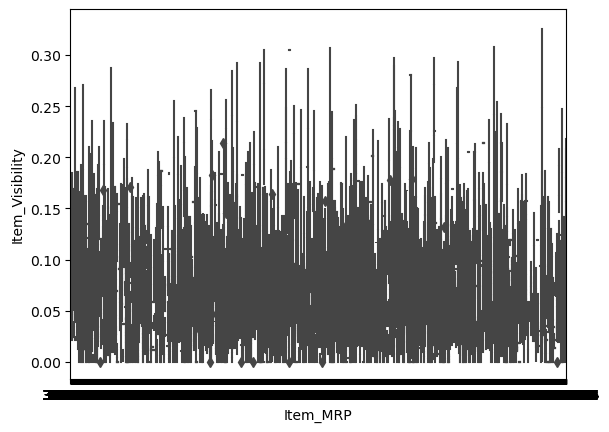

In [15]:
sns.boxplot(x=df.Item_MRP,y=df.Item_Visibility)

<Axes: xlabel='weight', ylabel='Item_Type'>

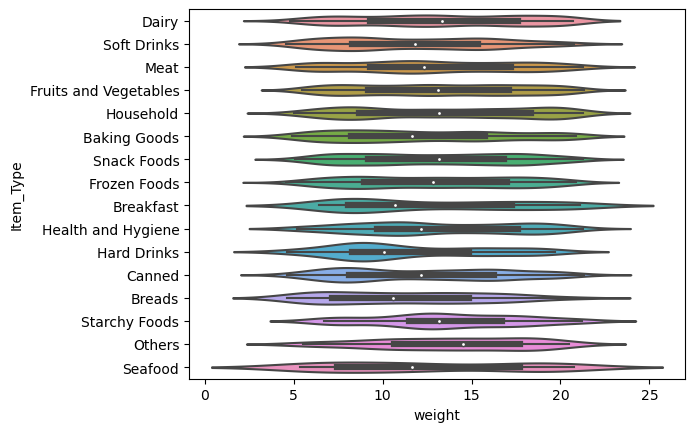

In [16]:
sns.violinplot(x='weight', y='Item_Type', data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='weight'>

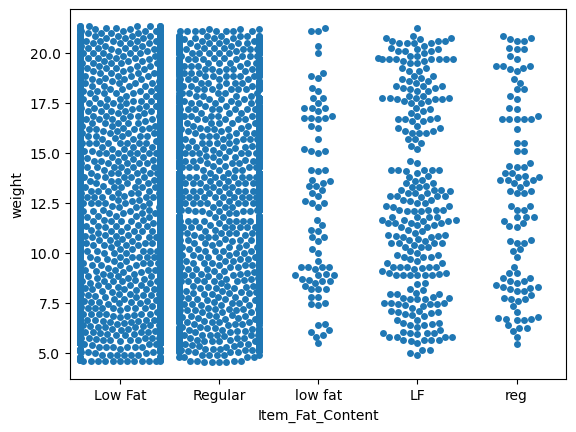

In [17]:
sns.swarmplot(x='Item_Fat_Content',y='weight',data=df)

<Axes: xlabel='weight', ylabel='Density'>

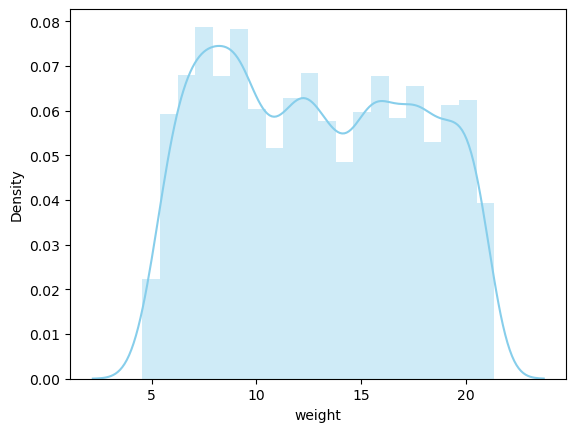

In [18]:
sns.distplot(df['weight'],kde = True, color = 'skyblue')

In [19]:
cat_cols =['Outlet year','Outlet year.1','Outlet_Type']
encoder = OneHotEncoder(drop='first',sparse= False)
encoded_cols =pd.DataFrame(encoder.fit_transform(df[cat_cols]),columns=encoder.get_feature_names_out(cat_cols))

In [20]:
std_cols = [ "Item_MRP", "Item_Visibility"]
stdscalar = StandardScaler()
stdscalar_cols = pd.DataFrame(stdscalar.fit_transform(df[std_cols]), columns = stdscalar.get_feature_names_out(std_cols))

In [21]:
x= pd.concat([encoded_cols,stdscalar_cols],axis=1)
y=df['Item_MRP']

In [22]:
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.8,random_state=42)
 

In [23]:
x_train

,Outlet year_1987,Outlet year_1997,Outlet year_1998,Outlet year_1999,Outlet year_2002,Outlet year_2004,Outlet year_2007,Outlet year_2009,Outlet year.1_33.9558,Outlet year.1_34.6216,...,Outlet year.1_10306.584,Outlet year.1_10993.6896,Outlet year.1_11445.102,Outlet year.1_12117.56,Outlet year.1_13086.9648,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP,Item_Visibility
549,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.487415,-0.599405
7757,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.474526,-0.361643
764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.470081,0.193620
6867,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.595901,-0.703303
2716,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.233979,1.377965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029050,4.268121
5191,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.049049,0.997049
5390,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.547519,-0.914595
860,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.370092,-0.228111


In [24]:
y_train

549     171.3448
7757    170.5422
764     111.7202
6867     41.6138
2716    155.5630
          ...   
5734    139.1838
5191     75.6670
5390    237.3590
860     117.9466
7270     95.7410
Name: Item_MRP, Length: 6818, dtype: float64

In [25]:
x_test

,Outlet year_1987,Outlet year_1997,Outlet year_1998,Outlet year_1999,Outlet year_2002,Outlet year_2004,Outlet year_2007,Outlet year_2009,Outlet year.1_33.9558,Outlet year.1_34.6216,...,Outlet year.1_10306.584,Outlet year.1_10993.6896,Outlet year.1_11445.102,Outlet year.1_12117.56,Outlet year.1_13086.9648,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP,Item_Visibility
7503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.988617,-0.772020
2957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.578319,0.096983
7031,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.588970,-0.481034
1084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.525323,-0.414092
856,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.907611,-1.040342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.221970,0.533459
3257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.115312,-1.281758
6346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.588970,-0.482942
6318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.453187,1.454639


In [26]:
y_test

7503     79.4302
2957     42.7086
7031     42.0454
1084    173.7054
856     197.5110
          ...   
7205    127.1704
3257    148.1734
6346     42.0454
6318     50.5008
6339    109.2254
Name: Item_MRP, Length: 1705, dtype: float64

In [27]:
model =LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
model.coef_

array([1.45671437e+00, 1.45671437e+00, 8.58202398e-14, ...,
       9.78939152e-14, 6.22714131e+01, 2.49800181e-14])

In [30]:
y_pred = model.predict(x_test)

In [31]:
x= {'actual':y_test, 'prediction':y_pred}
pd.DataFrame(data=x)

,actual,prediction
7503,79.4302,79.430200
2957,42.7086,42.708600
7031,42.0454,42.045400
1084,173.7054,173.705400
856,197.5110,197.511000
...,...,...
7205,127.1704,127.170400
3257,148.1734,148.173400
6346,42.0454,42.046290
6318,50.5008,50.500800


In [32]:
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.9999968261510367


In [33]:
meanabserror = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", meanabserror)

Mean Absolute Error:  0.008569662302279749


In [34]:
meansqrerror = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", meansqrerror)

Mean Squared Error:  0.011823974337209296


In [35]:
rmse = np.sqrt(meansqrerror)
print("RMSE : ", rmse)

RMSE :  0.10873809974985445
